# 1. 데이터 전처리

In [ ]:
import pandas as pd 
import importlib
import data_prepro 
import matplotlib.pyplot as plt 
import seaborn as sns 

#파일 불러오기
df = pd.read_csv('./data/prepro_final.csv' , index_col = [0])

weather, temp = data_prepro.read_data()

df_sales = data_prepro.prepro_data(df)
df_sales = df_sales.groupby('datetime')[['금액','수량']].sum().reset_index()

df_merge = data_prepro.make_feature(df_sales , weather , temp)
df_merge

# 2. 요인분석

✅ 요인에 따라 매출에 차이가 있을 것이다.

1. ANOVA (분산 분석)
    * 월 / 요일/ 계절 / 날씨

2. T-Test (독립 표본 t-검정)
    * 주말 / 공휴일 / 대학교 방학여부

3. 피어슨 상관계수 (선형관계 측정)
    * 기온

* 각 범주별 매출에 대한 차이를 분석하고, 그 차이가 통계적으로 유의미한지 검정
* 변수와 매출간의 관계를 분석하고, 해당 변수와 매출이 연관이 있는지 분석

##  2.1 날씨에 따른 매출 차이
* 날씨에 따라 매출에 차이가 있을 것이다.
* 날씨에 따라 매출에 차이가 없을 것이다.

In [ ]:
df_merge.groupby('날씨')['매출'].sum() /df_merge['날씨'].value_counts()

In [11]:
#날씨에 따른 평균 매출 차이 검정
import scipy.stats as spst

#비 여부에따른 평균 매출 차이 검정
rain = df_merge.loc[df_merge['날씨'] == '맑음' , '매출']
not_rain = df_merge.loc[df_merge['날씨'] == '비' , '매출']

#t-test
spst.ttest_ind( not_rain , rain  , equal_var = False)

TtestResult(statistic=0.43398077163826754, pvalue=0.6646889816483568, df=242.0436675556506)

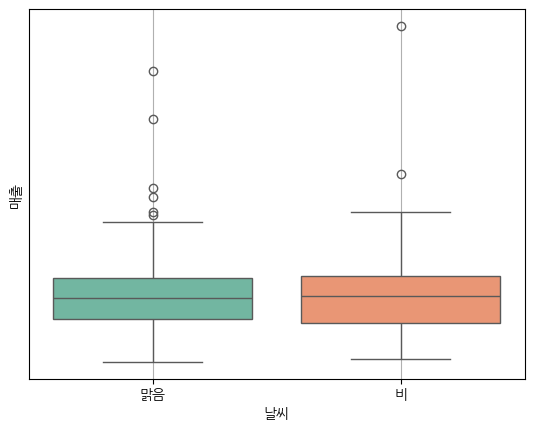

In [12]:
sns.boxplot(x = '날씨',y = '매출' , data = df_merge,palette = "Set2")
plt.yticks([])
plt.grid()
plt.show()

* p-value가 0.05보다 크다
* 날씨에 따라 매출 차이가 있다고 할 수 없다(귀무가설 기각 X)
* barplot으로 시각화 했을때 날씨에 따라 매출차이가 거의 없다.

## 2.2 월에 따른 매출 차이
* 귀무가설 : 월에 따라 매출에 차이가 있을 것이다.
* 대립가설 : 월에 따라 매출에 차이가 없을 것이다.

In [ ]:
df_merge.groupby('월')['매출'].sum() / df_merge['월'].value_counts()

In [14]:
import scipy.stats as spst

m_1 = df_merge.loc[df_merge.월 == 1 , '매출']
m_2 = df_merge.loc[df_merge.월 == 2 , '매출']
m_3 = df_merge.loc[df_merge.월 == 3 , '매출']
m_4 = df_merge.loc[df_merge.월 == 4 , '매출']
m_5 = df_merge.loc[df_merge.월 == 5 , '매출']
m_6 = df_merge.loc[df_merge.월 == 6 , '매출']
m_7 = df_merge.loc[df_merge.월 == 7 , '매출']
m_8 = df_merge.loc[df_merge.월 == 8 , '매출']
m_9 = df_merge.loc[df_merge.월 == 9 , '매출']
m_10 = df_merge.loc[df_merge.월 == 10 , '매출']
m_11 = df_merge.loc[df_merge.월 == 11 , '매출']
m_12 = df_merge.loc[df_merge.월 == 12 , '매출']

spst.f_oneway(m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10, m_11,m_12)

F_onewayResult(statistic=5.577291397748125, pvalue=1.9754892844994075e-08)

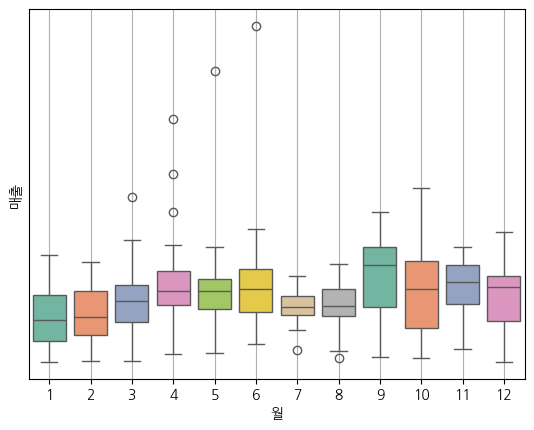

In [15]:
sns.boxplot(x = '월',y = '매출' , data = df_merge , palette = "Set2")
plt.yticks([])
plt.grid()
plt.show()

* p-value가 0.05보다 작고, F-통계량은 5이다.
* 월에 따라 매출에 차이가 있다고 볼 수 있다. (귀무가설 기각 O)

## 2.3 요일에 따른 매출 차이
* 귀무가설 : 요일에 따라 매출에 차이가 있을 것이다.
* 대립가설 : 요일에 따라 매출에 차이가 없을 것이다.

In [ ]:
df_merge.groupby('요일')['매출'].sum() / df_merge['요일'].value_counts()

In [17]:
#요일에 따른 평균 매출 검정
mon = df_merge.loc[df_merge.요일 == 'Monday' , '매출']
tue = df_merge.loc[df_merge.요일 == 'Tuesday' , '매출']
wed = df_merge.loc[df_merge.요일 == 'Wednesday' , '매출']
thu = df_merge.loc[df_merge.요일 == 'Thursday' , '매출']
fri = df_merge.loc[df_merge.요일 == 'Friday' , '매출']
sat = df_merge.loc[df_merge.요일 == 'Saturday' , '매출']
sun = df_merge.loc[df_merge.요일 == 'Sunday' , '매출']

spst.f_oneway(mon,tue,wed,thu,fri,sat,sun)

F_onewayResult(statistic=26.2935477282135, pvalue=4.545245329997316e-27)

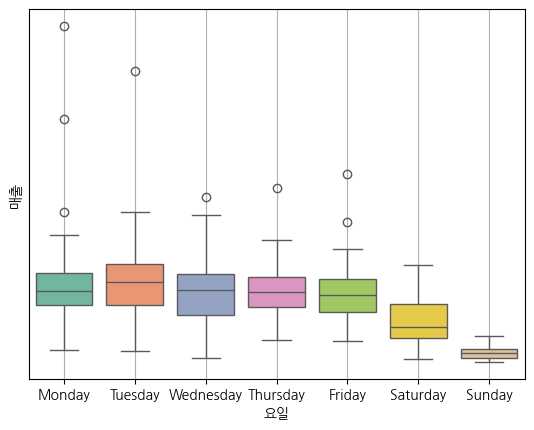

In [18]:
order = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' ,'Sunday']
sns.boxplot(x = '요일',y = '매출' , data = df_merge , order = order, palette = "Set2")
plt.yticks([])
plt.grid()
plt.show()

* p-value가 0.05보다 작고 , F통계량은 26이다.
* 요일에 따라 매출 차이가 있다고 할 수 있다.(귀무가설 기각 O)
* barplot으로 시각화 했을 때 월-화요일에 평균 매출액이 높은 편이다.
* 토요일에 매출이 저조한 편이다.

## 2.4 연휴여부에 따른 매출 차이
* 귀무가설 : 연휴에 따라 매출에 차이가 있을 것이다.
* 대립가설 : 연휴에 따라 매출에 차이가 없을 것이다.

In [ ]:
df_merge.groupby('공휴일여부')['매출'].sum() / df_merge['공휴일여부'].value_counts()

In [20]:
#공휴일 여부에따른 평균 매출 차이 검정
holiday = df_merge.loc[df_merge['공휴일여부'] == 0 , '매출']
not_holiday = df_merge.loc[df_merge['공휴일여부'] == 1 , '매출']
#t-test
spst.ttest_ind( not_holiday , holiday  , equal_var = False)

TtestResult(statistic=-11.348012734356868, pvalue=3.849027635293825e-11, df=24.04347166012648)

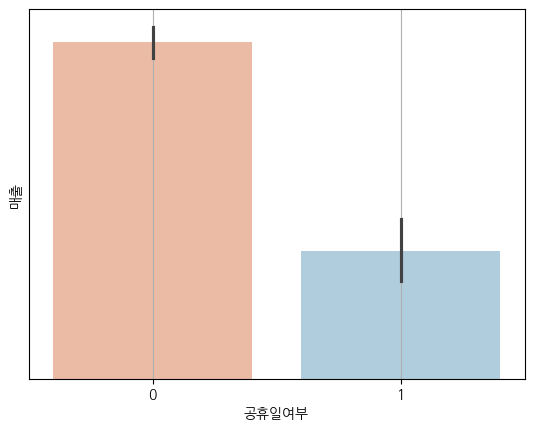

In [21]:
sns.barplot(x = '공휴일여부',y = '매출' , data = df_merge, palette = "RdBu")
plt.yticks([])
plt.grid()
plt.show()

## 2.5 개강/방학 여부
* 샐러드기업은 대학가에 위치함을 고려하여 개강/방학 기간을 고려


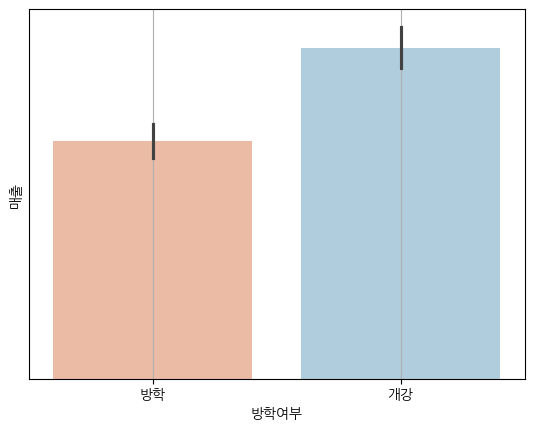

In [22]:
sns.barplot(x = '방학여부', y = '매출' , data = df_merge, palette = "RdBu")
plt.yticks([])
plt.grid()
plt.show()

In [23]:
df_merge['방학여부'].value_counts()

방학여부
개강    282
방학    203
Name: count, dtype: int64

In [ ]:
df_merge.groupby('방학여부')['매출'].sum() / df_merge['방학여부'].value_counts()

In [25]:
#방학여부에따른 평균 매출 차이 검정
vacation = df_merge.loc[df_merge['방학여부'] == '방학' , '매출']
not_vacation = df_merge.loc[df_merge['방학여부'] == '개강' , '매출']
#t-test
spst.ttest_ind( not_vacation , vacation  , equal_var = False)

TtestResult(statistic=6.900049228082678, pvalue=1.6426712320478802e-11, df=481.8731778562684)

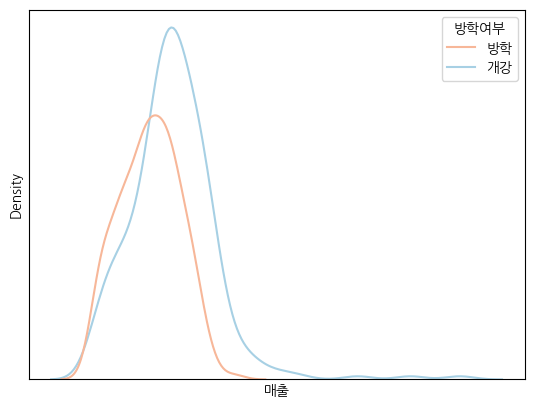

In [26]:
sns.kdeplot(hue= '방학여부', x = '매출' , data = df_merge, palette = "RdBu")
plt.xticks([])
plt.yticks([])
plt.show()

* t통계량이 6.9이고 p값이 0.05보다 작다.
* 방학여부에 따라 평균 매출에는 차이가 있다.
* 시각화 결과 개강시기에 매출이 더 높은 경향을 보인다.
* 샐러드 가게가 대학가에 위치한만큼 방학여부의 관계는 있을 것이라 판단한다.


## 2.5 기온
* 기온과 매출간의 관계

In [27]:
from scipy.stats import pearsonr

# Pearson 상관계수와 p-value 계산
correlation, p_value = pearsonr(df_merge['평균기온'], df_merge['매출'])
print("상관계수:", correlation)
print("p-value:", p_value)

상관계수: 0.17381996722797854
p-value: 0.00011936023920942608


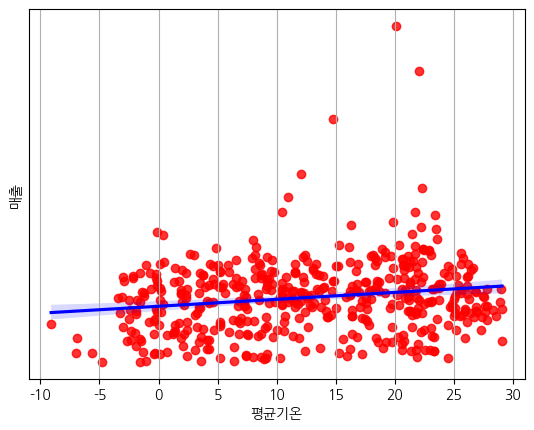

In [28]:
sns.regplot(x='평균기온', y='매출', data=df_merge, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.grid()
plt.yticks([])
plt.show()

* 기온과 매출의 상관계수는 0.17로 매우 약한 양의 상관관계를 보인다.
* 기온에 따라 매출에 큰 영향을 미치지 않는 것으로 판단된다.

# 3. 결과

* 매출에 영향을 미치는 유의미한 변수
* `월` , `요일`, `대학방학여부`